<a href="https://colab.research.google.com/github/dlskawns/RecSys_and_Retrieval_Study/blob/main/7_15_Multi_Armed_Bandit_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Armed Bandit

Exploitation(착취)와 Exploration(탐험)을 활용한 강화학습의 원리를 이용한 추천입니다.

실제 비즈니스에서 매우 많이 활용하는데, 카카오와 네이버에서도 이 방식을 많이 활용했다고 합니다.




## MAB 개요

여러개의 선택지 중 어떤 것을 선택할지 그 방식을 고르는 추천 알고리즘.  

카지노의 K개 슬롯머신을 N번 플레이 할 수 있는 상황. 각각의 슬롯머신은 당첨(1 or 0) 확률이 다를 때 수익을 최대화 하기 위한 선택의 순서를 찾는 것.



#### Exploration(탐험): 정보를 더 얻기 위해 계속해서 새로운 선택지를 선택하는 것
* 이것이 너무 적으면 더 잘 당첨될 수 있는 선택지를 포기하게 될 수 있습니다.
* 너무 많을 경우, reward에 비해 비용이 많이 나가게 됩니다.
#### Exploitation(착취): 현재까지의 기록으로 보아 가장 많이 나온 것을 선택하는 것
* 탐험과의 trade off가 있고, 이것을 최소화 하는 것이 MAB의 포인트입니다.







## MAB 문제

### MAB의 방식
* $q*(a) \dot= \mathbb{E}[R_t|A_t = a]$
  * $t$: 타임스텝 또는 횟수
  * $A_t$: 타임스텝 t에 진행한 행동 number (슬롯머신의 번호)
  * $R_t$: 타임스텝 t에 진행한 행동 $A_t$의 액션 $a$의 리워드(0, 1)
  * $q*(a)$: 이러한 액션 $a$의 reward의 실제 기대값

* 여기서 $q*(a)$를 추정할 때, 추정 가치가 최대인 action($a$)를 선택해 추정값 $Q_t(a)$를 정밀하게 하는 것
  * Greedy Action: 전체 선택지에 대해 n번 시행 중 가장 많이 reward 나온 선택지를 선택하는 것
    * Exploitation(착취)






### MAB 종류
#### 1. Simple Average Method (greedy action)
단순 평균 값을 통해 기댓값 $q*(a)$를 아주 간단하게 추정하는 방식
* 평균값에 따라 가장 추정가치가 높은 action을 선택하는 greedy algorithm
  * $A_t = argmaxQ_t(a)$

* $Q_t(a) \dot= \frac {타임스텝 t 이전에a의 reward의합}{타임스텝t이전의 a까지의 시도 수} = \frac {\sum_{i=1}^{t-1}R_i\cdot\mathbb{1}_A=a}{}$

### Epsilon greedy - 일반적으로 MAB에서 가장 기본이 되는 BASELINE 모델. 이것보다 항상 더 성능이 좋아야 한다.
* exploration이 적은 상태에서의 greedy action 방식을 조정한 것. 
* 동전을 예로 들어 앞면이 되면 Greedy, 뒷면이 나오면 랜덤 선택을 하게 되는 방식으로 이 때의 epsilon은 0.5로 설정이 됨. 일반적으로는 epsilon을 0.1~0.2로 설정해서 진행한다. 


### UCB(Upper Confidence Bound) - 특정 상태에서 선택이 적은 것을 찾아 선택 가능성을 높여줌
* $A_t \dot=argmax[Q_t(a) + c\sqrt {\frac {\text{ln}t}{N_t(a)}}]$
* $t: 타임 스텝$
* $Q_t(a)$: 타임스텝 $t$에서의 액션 $a$에 대한 예측된 reward (simple average)
* $N_t(a)$: 액션 $a$를 선택한 횟수 
* $c$: exploration을 조정하는 하이퍼파라미터
* 기본 추정치에 새로운 텀을 더해주는데, $\text{ln}t$로 인해 타임스텝이 증가하면 값 자체가 커지며, $a$가 분모에 있기 때문에 선택한 횟수가 적으면 그만큼 또 값이 커져 해당 액션에 대한 스코어가 커지게 됨
* 확률의 개념이 활용되지 않음 -> 기터비니스틱 하다고 하며, 특정 타임스텝$t$와 액션 $a$가 정해져 있기 때문에, 어느 순간이든 아웃풋이 정해져있음
* 결국 뒤의 텀을 통해 argmax를 취하면서 액션을 선택하다보면 어느순간 뒤의 텀은 작아지면서 기본적인 평균 $Q_t(a)$에 수렴하게 된다.


### MAB를 활용한 추천
* MAB의 액션이 곧 추천 아이템이 됨.
  * ex:  추천 아이템 100개 중에 3번을 추천하는 것 -> 3번 액션을 선택
* Reward: 유저가 클릭을 하는지 안하는지 = CTR. 100번 노출해서 10번 클릭을 유도했다면, CTR은 10%가 됨

* MF는 사용자 또는 아이템에 대한 스코어를 구하는 것인데, MAB는 CTR을 maximising하는 것을 목표로 함

* 단순 MAB만 한다면 개인화 추천 자체는 힘들 수 있음. 사람에 따라 reward가 다를 것이기 때문에 클러스터링 등을 통해서 사용자를 그룹화 하는 방법도 있음

### 톰슨 샘플링(Thompson Sampling)

* epsilon greedy: 가장 좋은 것 혹은 epsilon 확률로 random sampling 
* UCB: 기본 액션 뒤에 불확실성 term을 두어서 별로 안 뽑힌 액션이 선택될 수 있도록 설정
* 톰슨: 위 두가지 방법과는 달리 주어진 action들에 해당하는 확률분포를 구해서 해결. 데이터가 많을 경우는 확률분포가 확실하기 때문에 톰슨이 좀 더 유리해질 수 있음.(베타분포 활용)

#### 베타분포

* 두 개의 양의 매개변수 $\alpha$와 $\beta$로 표현되며, 



#### 톰슨 샘플링 원리
k개의 선택지에 대해 각각 베타분포를 적용  
데이터가 적을 때는 분산이 커서 이것저것 나오더라도, 데이터가 쌓이면서 분산이 좁아지고, 분포 자체가 뾰족해져 해당 분포의 액션을 exploit 하도록 만드는 방법

* 아이템이 k개가 있고, 각 아이템 하나하나 별로 베타분포가 있다고 가정
  * action1 -> $beta_1$
  * action2 -> $beta_2$
*  베타분포: 두 개의 양의 변수 $\alpha, \beta$로 표현할 수 있는 확률 분포 -> 0~1의 값을 가짐
  * $Beta(x|\alpha, \beta) = \frac {1}{B(\alpha, \beta}x^{\alpha -1}(1-x)^{\beta-1}$

* 아이템 별로 베타 분포 내에서 샘플링을 하고, 해당 샘플 내 가장 높은 것을 선택 

#### 사용자 노출 아이템 선정 예시
* 아이템을 클릭한 수 ($\alpha$)

* 아이템을 클릭하지 않은 수 ($\beta$)
* 아이템 클릭률 (CTR) = $beta(\alpha + 1, \beta + 1)$

|아이템|click($\alpha$)|non-click($\beta$)|표본평균|
|:-:|:-:|:-:|:-:|
|아이템1|3|10|$\frac {3}{3+10}$|
|아이템2|2|4|$\frac {2}{2+4}$|
|아이템3|1|9|$\frac {1}{1+9}$|


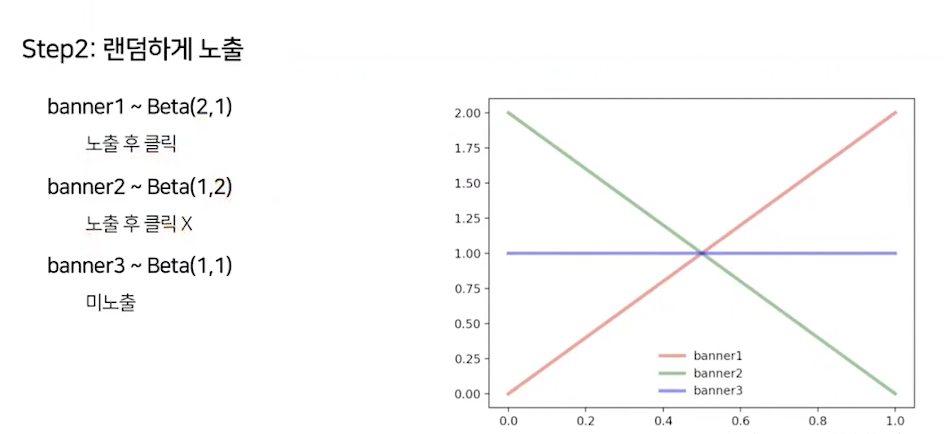

위와 같이 랜덤하게 노출을 한 뒤에, 해당 분포 내에서의 샘플링을 통해 나온 가장 높은 값을 노출시켜 클릭이 되는지 안되는지의 여부에 따라 새로운 파라미터 $\alpha, \beta$로 설정됨

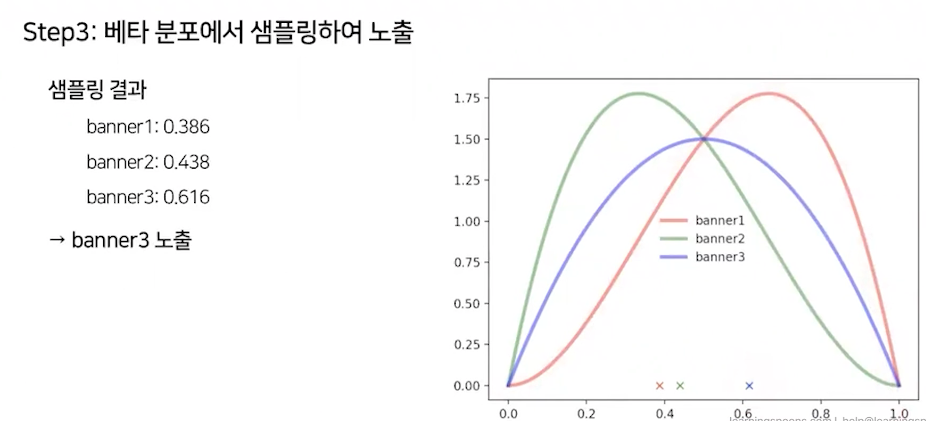

### UCB와 톰슨샘플링

* UCB의 경우 뒷쪽 텀을 매 시행때 업데이트 하지 않으면 똑같은것이 나감
* 톰슨 샘플링의 경우 샘플링을 다시 할때마다 분포가 바뀌어 확률 자체가 달라지게 됨
* 다양한 문제에 대해 톰슨이 UCB보다 우수한 성능을 보였음 

### Regret
최적의 action으로 얻었을 reward - 내 선택으로 얻은 reward.  
reward가 작을수록 더 좋은 알고리즘




### Bandit 문제

* 실제 서비스 지표 클릭 / 구매를 모델 reward로 가정
* 해당 reward를 최대화

 ### MAB 유저 추천
* 모든 유저에 대해 bandit을 만드는 것은 불가능
* 클러스터를 통해 군집을 만들어 군집별로 bandit을 구축 -> 클러스터 별로 인기있는 아이템 후보리스트 만들기

* 필요한 bandit 개수: 유저 클러스터 개수 x 후보 아이템 개수
* 실시간으로 bandit의 학습을 update해서 만드는 것이 중요함 -> 업데이트 주기가 짧아야 효과적임



 ### MAB 아이템 추천

 주어진 아이템과 유사한 후보 아이템 리스트 생성 -> 그 내부에서 bandit 적용

 * 아이템 간의 유사도를 우선 구해본다 (MF, Item2vec을 이용해서)
 * 이후 Bandit을 각각 아이템에 적용해 유사도가 아닌 CTR이 높은 아이템을 추천
 * 필요 Bandit 개수: 아이템 개수 x 후보 아이템 개수
  * 아이템이 너무 많을 경우 작동이 어려울 수 있다.
  * 웹툰의 경우 그렇게 많지 않으므로 수천개 x 100개(후보리스트)
  * 쿠팡과 같은 커머스의 경우 수억개 x 100개 -> 개수가 너무너무 많아짐


### MAB의 평가 방법

policy를 만드는 것이 목표인만큼 일반적인 방법들이랑 평가방식이 다름 
* 톰슨샘플링의 경우 오프라인 테스트를 할 때에도 샘플링에 따라 그 분포가 계속해서 달라지기 때문에 그 업데이트 상황을 봐야함
* 이 톰슨 샘플링을 통해 어떤 결과가 나왔는지에 따라 평가를 해야하는데, 그럼 과거에 3을 뽑은 적이 있다가 4를 뽑게된 경우, 그랬던 적이 없으면 아예 평가 자체가 불가능한 상황
* 위 상황을 대비해 해결가능한 것이 아래와 같음
  * 시간 순서로 정렬된 데이터를 N개 단위 배치로 나눔
  * 각 배치마다 현재 정책에 맞게 아이템 추천
  * **추천된 결과**와 해당 결과의 **실제 리워드**를 비교해 누적 리워드를 업데이트
  * 추천 아이템과 실제 노출된 아이템이 같지 않으면 리워드 업데이트 안함
  * 추천 아이템과 실제 노출된 아이템이 같은 경우만 리워드 업데이트
  * 누적 리워드 업데이트 후, 해당 배치의 데이터로 정책 업데이트
  * 다음 배치에서 위를 다시 수행